# Household factors leading to conviction of a crime

In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.utils import resample 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from IPython.display import clear_output


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.metrics import r2_score
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats
from statsmodels.formula.api import rlm
import statsmodels.api as sm

### Executive Summary

#### Purpose of the notebook
This project uses data from Stats SA to predict number of crime convictions using household data (household income, distance to the nearest police station, living conditions etc.)

#### What is being modelled
Determine the relationship between the number of crime convictions (Conviction of theft of personal property,Conviction of fraud,Conviction of assault etc.) and household living condtions (Type of toilet facility,Access to/use electricity,Victim of other crimes etc.). Does having no access to electricity lead to a person commiting more crimes? Is Conviction of assault result from being a victim of assault?

#### What are the main results
Determine if the a statistical relationship between any crime conviction to a persons living conditions, place of dwelling and overall community development. Perform statical modeling methods to predict the relationship

#### Limitations

The sample size does not represent South Africas entire population well. We used imputation methods to fill in data that was missing(e.g replacing 'Not applicable' with a 'NO') and we removed data that is not useful to our analysis( e.g  ' Unspecified, Other').Some features don’t have a clear correlation with the number of convictions and may limit the models ability to perform with high accuracy. 


## Introduction
The general level of crime as estimated by VOCS has been declining during the past five years but increased in 2016/17 and 2017/18.

Household crimes increased by 5% to a total of 1,5 million incidences of crime while individual crime also increased by 5% to a total of 1,6 incidences, affecting 1,4 million individuals aged 16 and above. Northern Cape had the highest increase in both household and individual crimes. Housebreaking or burglary was the most dominant (54%) crime category among crimes measured by the Victims of Crime Survey (VOCS). An estimated total of 830 thousand incidences of housebreaking occurred in 2017/18, affecting 4,25% of all South African households. Nearly 32% of items stolen during housebreaking were clothes, followed by cellphones (24%) and food (22%). http://www.statssa.gov.za/?p=11627


### Research question

What variables affect conviction of a crime and how do they affect it?



1. </br>
2. </br>
3. </br>
4. </br>



### Methodology
A brief overview of the methodology is as follows:<br/>
1. Read in data <br/>
2. Encode variables - All variables in the dataset have been encoded (see next section: Read in the data) <br/>
3. Exploratory plots - Of the number of convictions VS no_food, province_code, income, present household living standard, distance to the nearest police station, no money for five days and total number of instances Of person being a victim<br/>
4. Feature selection using step-wise regression <br/>
5. Bootstrapping for feature selection and testing<br/>
6. Comparison of regression coefficient over the years <br/>

# 1. Data Description

#### link to dataset: http://nesstar.statssa.gov.za:8282/webview/

* Collection method: Survey of 23380 household across all 9 provinces
* Date collected: April 10, 2017
* Date Downloaded: April 07, 2021
* Data size: 23380 rows, 307 columns

## Validation 

 The Population group of head of household in the dataset reflects that are 18995 cases of Black African compared to  2490 Coloured, 442 Indian/Asian and 1453 White. This can lead to the results being bias towards non-Black Africans. 


## Variable Encoding
##### Q116PRESENT - Present household living standard
1 - Wealthy<br/>
2 - Very comfortable<br/>
3 - Reasonably comfortable<br/>
4 - Just getting along<br/>
5 - Poor<br/>
6 - Very poor<br/>
9 - Unspecified<br/>

#### Q51MAIN - Description of the main building

1 - Formal dwelling/house or brick/concrete block structure on a separate stand or yard or on a farm<br/>
2 - Traditional dwelling/hut/structure made of traditional materials<br/>
3 - Flat or apartment in a block of flats<br/>
4 - Cluster house in security complex<br/>
5 - Town house (semi-detached house in a complex)<br/>
6 - Semi-detached house<br/>
7 - Formal dwelling/house/flat/room in backyard<br/>
8 - Informal dwelling/shack in backyard<br/>
9 - Informal dwelling/shack not in backyard<br/>

#### Q51NOOTH - No other dwelling occupied

1 - Yes <br/>
8 - Not applicable <br/>
9 - Unspecified <br/>

#### Q52AWALLS - Main material used for walls of the main dwelling

1 - Bricks <br/> 
2 - Cement/concrete <br/> 
3 - Corrugated iron/Zinc 
4 - Wood <br/> 
5 - Plastic <br/> 
6 - Cardboard <br/> 
7 - Mixture of mud and cement <br/> 
8 - Wattle and daub (e.g. sticks and mud) <br/> 
9 - Tiles <br/> 
10 - Mud <br/> 
11 - Thatch/grass<br/> 
12 - Asbestos <br/> 
13 - Other, specify <br/> 
99 - Unspecified <br/>

#### Q52AROOF - Main material used for the roof of the main dwelling

1 -  Bricks <br/>
2 - Cement/concrete <br/> 
3 - Corrugated iron/Zinc <br/>
4 - Wood <br/> 
5 - Plastic <br/>
6 - Cardboard <br/>
7 - Mixture of mud and cement <br/>
8 - Wattle and daub (e.g. sticks and mud) <br/>
9 - Tiles <br/>
10 - Mud <br/>
11 - Thatch/grass <br/>
12 - Asbestos <br/>
13 - Other, specify <br/>
99 - Unspecified <br/>

#### Q54ADWELLING - Government housing subsidy for other dwelling

1 - Yes <br/>
2 - No <br/> 
3 - Don’t know <br/>
9 - Unspecified <br/>
	
#### Q54AOTHER - Government housing subsidy for other dwelling

1 - Yes <br/>
2 - No <br/> 
3 - Don’t know <br/>
9 - Unspecified<br/>

#### Q56DRINK - Main source of water for drinking

1 - Piped (tap) water in the dwelling/house <br/>
2 - Piped (tap) water in yard  <br/>
3 - Borehole in yard  <br/>
4 - Rain-water tank in yard  <br/>
5 - Neighbour’s tap  <br/>
6 - Public/communal tap  <br/>
7 - Water-carrier/tanker
8 - Borehole outside yard  <br/> 
9 - Flowing water/stream/river  <br/>
10 - Stagnant water/dam/pool  <br/>
11 - Well  <br/>
12 - Spring  <br/>
13 - Other, specify  <br/>
99 - Unspecified <br/>

#### Q56OTHER - Main source of water for other use

1 - Piped (tap) water in the dwelling/house <br/>
2 - Piped (tap) water in yard <br/>
3 - Borehole in yard <br/>
4 - Rain-water tank in yard <br/>
5 - Neighbour’s tap <br/>
6 - Public/communal tap <br/>
7 - Water-carrier/tanker <br/>
8 - Borehole outside yard<br/>
9 - Flowing water/stream/river <br/>
10 - Stagnant water/dam/pool <br/>
11 - Well <br/>
12 - Spring <br/> 
13 - Other, specify <br/>
99 - Unspecified <br/>

#### Q518TOILET - Type of toilet facility

1 - Flush toilet connected to a public sewerage system <br/>
2 - Flush toilet connected to a septic tank <br/> 
3 - Chemical toilet <br/> 
4 - Pit latrine/toilet with ventilation pipe <br/> 
5 - Pit latrine/toilet without ventilation pipe <br/> 
6 - Bucket toilet (collected by municipality) <br/> 
7 - Bucket toilet (emptied by household) <br/>
8 - Ecological Sanitation Systems <br/>
9 - None <br/> 
10 - Other, specify <br/>
99 - Unspecified<br/>



#### Q524ELECT - Access to/use electricity

1 - Yes <br/>
2 - Not <br/>
9 - Unspecified <br/>

#### Q531POLICE - Distance to the nearest police station

1 - Less than 500m <br/>
2 - 500m – less than 1km <br/>
3 - 1km – less than 2km <br/>
4 - 2km – less than 5km <br/>
5 - 5km – less than 10km <br/>
6 - 10km – less than 20km <br/>
7 - 20km or more <br/>
8 - Not available <br/>
9 - Don’t know <br/>
99 - Unspecified <br/>

#### Q532FOOD - Mode of transport to the nearest food market

1 - Walking <br/>
2 - Taxi <br/> 
3 - Bus (public)<br/>
4 - Train <br/>
5 - Own transport <br/>
6 - Other, specify <br/>
9 - Unspecified<br/>

#### Q62OWNSHIP - Ownership of main dwelling

1 - Owned and fully paid off <br/>
2 - Owned, but not yet fully paid off, financed by a mortgage bond <br/>
3 - Owned, but not yet fully paid off, financed by another type of loan <br/>
4 - Rented as part of employment contract of household member <br/>
5 - Rented not as part of employment contract of household member <br/>
6 - Occupied rent-free as part of employment contract of household member <br/>
7 - Occupied rent-free not<br/>

#### Q651TOTROOMS - Total number of rooms
99 - Unspecified 

#### Q658VALUE - Estimated value of the dwelling

1 - R0 – R5 000 917 <br/>
2 - R5 001 – R10 000 <br/>
3 - R10 001 – R20 000 <br/>
4 - R20 001 – R50 000 <br/>
5 - R50 001 – R100 000 <br/>
6 - R100 001 – R250 000 <br/>
7 - R250 001 – R500 000 <br/>
8 - R500 001 – R1 000 000 <br/>
9 - R1 000 001 – R2 000 000 <br/>
10 - R2 000 001 – R3 000 000 <br/>
11 - R3 000 001 – R 4 000 000 <br/>
12 - More than R 4 000 000 <br/>
13 - Don’t know <br/>
88 - Not applicable <br/>
99 - Uspecified


#### Q61035POLICE - Police on the streets in the local area

1 - Have <br/>
2 - Don't have <br/>
3 - Don't Know <br/>
9 - Unspecified

#### Q224BNOMONEY5 - No money for 5 or more days

1 - Yes <br/>
2 - No <br/>
8 - 8 Not applicable <br/>
9 - Unspecified

#### Q2341SAVING - Household Savings

1 - Yes <br/>
2 - No <br/>
9 - Unspecified


#### province_code -  Province Code

1 - Western Cape <br/>
2 - Eastern Cape <br/>
3 - Northern Cape <br/>
4 - Free State <br/>
5 - KwaZulu-Natal <br/>
6 - North West <br/>
7 - Gauteng <br/>
8 - Mpumalanga <br/>
9 - Limpopo<br/>


#### SETTLEMENT_TYPE - Settlement Type

1 - Urban formal <br/>
2 - Urban informal <br/>
4 - Traditional area <br/>
5 - Rural formal<br/>



In [2]:
DF = pd.read_csv('household.csv')
DF.head()

,UQNO,SURVEYDATE,Q11CPARTHH,Q11CMANY,Q15OTHPERS,Q116PRESENT,Q116PERSONNO,Q51MAIN,Q51OTHER,Q51NOOTH,...,income_pcp_quintile,expend_inkind_decile,expend_inkind_quintile,income_inkind_decile,income_inkind_quintile,Expenditure_weighted,Expenditure_inkind_weighted,Income_weighted,Income_inkind_weighted,hholds_wgt
0,813004940000021702,1032015,2,88,2,5,1,2,88,1,...,1,1,1,1,1,1.516301e+06,1.516301e+06,0.0,0.0,624.763809
1,607001710000011901,2042015,2,88,2,6,1,1,88,1,...,1,1,1,1,1,2.596009e+06,2.596009e+06,0.0,0.0,509.986828
2,774017360000010201,4102015,2,88,2,6,1,7,88,1,...,1,1,1,1,1,5.079606e+06,5.079606e+06,0.0,0.0,828.185078
3,236006020000000901,1022015,2,88,2,6,1,2,2,8,...,1,1,1,1,1,2.105227e+06,2.105227e+06,0.0,0.0,341.725292
4,773024020070002701,3072015,1,99,2,5,2,1,99,9,...,1,1,1,1,1,6.038148e+06,6.038148e+06,0.0,0.0,928.854284


## Bootstrapping for feature selection

In [3]:
# The column names that will be used for the dataset
DATA = DF[['Q116PRESENT','Q51MAIN','Q51NOOTH','Q52AWALLS','Q52AROOF','Q53WALLS',
           'Q53ROOF','Q54ADWELLING','Q161CPUBATT','Q161CPRIVATT','Q54AOTHER','Q56DRINK','Q56OTHER','Q518TOILET',
          'Q524ELECT','Q531POLICE','Q532FOOD','Q62OWNSHIP','Q651TOTROOMS','Q658VALUE',
          'Q61035POLICE','Q224BNOMONEY5','Q2341SAVING','province_code','SETTLEMENT_TYPE',
           'Ageofhead','hhsize','income']]

DATA.columns

Index(['Q116PRESENT', 'Q51MAIN', 'Q51NOOTH', 'Q52AWALLS', 'Q52AROOF',
       'Q53WALLS', 'Q53ROOF', 'Q54ADWELLING', 'Q161CPUBATT', 'Q161CPRIVATT',
       'Q54AOTHER', 'Q56DRINK', 'Q56OTHER', 'Q518TOILET', 'Q524ELECT',
       'Q531POLICE', 'Q532FOOD', 'Q62OWNSHIP', 'Q651TOTROOMS', 'Q658VALUE',
       'Q61035POLICE', 'Q224BNOMONEY5', 'Q2341SAVING', 'province_code',
       'SETTLEMENT_TYPE', 'Ageofhead', 'hhsize', 'income'],
      dtype='object')

## Aspects of Data Quality
Validity: Data conforms with csv standard format<br/>
Accuracy: Data represents the reality of the south african population according to Statistics South Africa<br/>
Completeness: All records present<br/>
Consistency: The data is in logical agreement <br/>
Uniformity: The same units are used across a given field<br/>

## Ability to Answer Question 

The features chosen in the above section, bootstrapping for feature selection appear to be approapriate for answering the research question.

## Data Wrangling

### Tidyness of the data
The data contains 'Nan' values<br/> 
We are basically grouping all the attributes that use the same values for 'Nan' and droping all the rows that corresping to nan. we do this for all the following values.<br/>

3 - Don't Know<br/>
6 - Other, specify<br/>
9 - Unspecified<br/>
10 - Other<br/>
13 - Don’t know/Other<br/>
88 - Not applicable<br/>
99 - Unspecified<br/>


Q51NOOTH(No other dwelling occupied) all the ' 8 ' (Not applicable) will be converted to ' 2 ' meaning No.

To create columns for the number of convictions and instances of being a victim of crime, the individuals’ crimes committed and crimes experienced were tallied up into instances. The columns were then appended to the original data and columns that defined the type of crimes were removed. The data has 31 rows.

In [4]:
# The crime victims columns are in the range 142-159
# We are adding them to data.

# The total number of instances where one person has been a victim of crime is the sum of all specific instance 
# of a person being a victim.
# 2 represents no, 1 represents yes, 9 represents unspecified

victims = DF.iloc[:,141:159]
victims.replace({2:0,9:0},inplace=True)
# Total_IOPBV - total number of Instances Of Person Being a Victim
victims['Total_IOPBV'] = victims.sum(axis=1)

In [5]:
#T he crime conviction columns are in the range 160-177
# We are adding them to data.

convictions = DF.iloc[:,159:177]

#The total number of convictions is the sum of all specific convictions.
# 2 represents no, 1 represents yes, 9 represents unspecified
convictions.replace({2:0,9:0},inplace=True)
convictions['Total_number_of_convictions'] = convictions.sum(axis=1)

In [6]:
DATA = pd.concat([DATA,victims['Total_IOPBV']],axis=1)
DATA = pd.concat([DATA,convictions['Total_number_of_convictions']],axis = 1)

In [7]:
duplicates =DATA.duplicated(['Q116PRESENT','Q51MAIN','Q51NOOTH','Q52AWALLS','Q52AROOF','Q53WALLS',
           'Q53ROOF','Q54ADWELLING','Q161CPUBATT','Q161CPRIVATT','Q54AOTHER','Q56DRINK','Q56OTHER','Q518TOILET',
          'Q524ELECT','Q531POLICE','Q532FOOD','Q62OWNSHIP','Q651TOTROOMS','Q658VALUE',
          'Q61035POLICE','Q224BNOMONEY5','Q2341SAVING','province_code','SETTLEMENT_TYPE',
           'Ageofhead','hhsize','income'])
np.count_nonzero(duplicates)

2

There are no duplicates in the dataset

In [8]:
DATA_DIRTY = DATA.copy()
# We will be droping  rows due to the fact that they represent 'Nan'

# drop 3 - Don't Know
DATA = DATA.drop(DATA[(DATA.Q54ADWELLING == 3) | (DATA.Q54AOTHER == 3) | (DATA.Q61035POLICE == 3)].index)

# drop 6 - Other, specify
DATA = DATA.drop(DATA[(DATA.Q532FOOD == 6)].index)

# drop 9 - Unspecified
DATA = DATA.drop(DATA[(DATA.Q116PRESENT == 9) | (DATA.Q51NOOTH  == 9) | (DATA.Q54ADWELLING == 9) | (DATA.Q54AOTHER == 9 ) | (DATA.Q524ELECT  == 9) | (DATA.Q532FOOD == 9) | (DATA.Q61035POLICE == 9)| (DATA.Q531POLICE == 9) | (DATA.Q224BNOMONEY5 == 9) | (DATA.Q2341SAVING == 9)].index)

# drop 10 - Other
DATA = DATA.drop(DATA[(DATA.Q518TOILET  == 10)].index)

# drop 13 - Don’t know/Other
DATA = DATA.drop(DATA[(DATA.Q658VALUE == 13) | (DATA.Q56OTHER == 13) | (DATA.Q56DRINK == 13) | (DATA.Q52AWALLS == 13) | (DATA.Q52AROOF == 13)].index)

# drop 88 - Not applicable
DATA = DATA.drop(DATA[(DATA.Q658VALUE == 88)].index)


#drop 8 - Not available
DATA = DATA.drop(DATA[(DATA.Q224BNOMONEY5 == 8) |  (DATA.Q531POLICE == 8)].index)


# drop 99 - Unspecified
DATA = DATA.drop(DATA[(DATA.Q658VALUE == 99) | (DATA.Q56OTHER == 99) | (DATA.Q56DRINK == 99) | (DATA.Q52AWALLS == 99) | (DATA.Q52AROOF == 99) | (DATA.Q651TOTROOMS == 99) | (DATA.Q531POLICE == 99) | (DATA.Q518TOILET == 99)].index) 

# replacing 8 with a 2.
DATA['Q51NOOTH'].replace({8:2} , inplace = True)
DATA.reset_index(inplace = True)
DATA.head()

,index,Q116PRESENT,Q51MAIN,Q51NOOTH,Q52AWALLS,Q52AROOF,Q53WALLS,Q53ROOF,Q54ADWELLING,Q161CPUBATT,...,Q61035POLICE,Q224BNOMONEY5,Q2341SAVING,province_code,SETTLEMENT_TYPE,Ageofhead,hhsize,income,Total_IOPBV,Total_number_of_convictions
0,70,6,9,1,4,3,1,1,2,2,...,1,1,2,8,5,77,5,362.281096,0,0
1,72,6,9,1,3,3,1,1,2,0,...,2,2,2,7,4,52,5,533.033986,0,0
2,73,6,9,2,3,3,2,2,2,0,...,2,1,2,8,2,55,3,355.355991,0,0
3,74,6,9,1,3,3,2,3,2,1,...,1,1,2,1,1,49,3,363.727741,1,0
4,77,5,2,2,7,3,1,1,2,1,...,1,2,1,9,4,29,5,836.123491,0,0


For attribute Q51NOOTH we replaced instances with '8' representing 'Not Applicable' to '2', which represents 'No' to show whether an individual had more than 1 dwelling or not. We then carefully dropped the null values.

### Sense Checks
1. First we are checking if every attribute has the correct datatype<br/>

In [9]:
DATA.dtypes

index                            int64
Q116PRESENT                      int64
Q51MAIN                          int64
Q51NOOTH                         int64
Q52AWALLS                        int64
Q52AROOF                         int64
Q53WALLS                         int64
Q53ROOF                          int64
Q54ADWELLING                     int64
Q161CPUBATT                      int64
Q161CPRIVATT                     int64
Q54AOTHER                        int64
Q56DRINK                         int64
Q56OTHER                         int64
Q518TOILET                       int64
Q524ELECT                        int64
Q531POLICE                       int64
Q532FOOD                         int64
Q62OWNSHIP                       int64
Q651TOTROOMS                     int64
Q658VALUE                        int64
Q61035POLICE                     int64
Q224BNOMONEY5                    int64
Q2341SAVING                      int64
province_code                    int64
SETTLEMENT_TYPE          

The attributes are in the correct datatype

In [10]:
DATA.groupby("province_code").count()["index"]

province_code
1    293
2    892
3    325
4    630
5    907
6    462
7    348
8    477
9    663
Name: index, dtype: int64

2.1 We are checking the frequency of each attribute by each province to see if we have covered enough samples per province. From the output we can say that we have covered enough samples per province since the counts are not that different from each other.<br/>

In [11]:
groupby_value = DATA.groupby("Q658VALUE").count()["index"]
groupby_value

Q658VALUE
1      428
2      511
3      717
4     1521
5      883
6      525
7      262
8       78
9       40
10      12
11      11
12       9
Name: index, dtype: int64

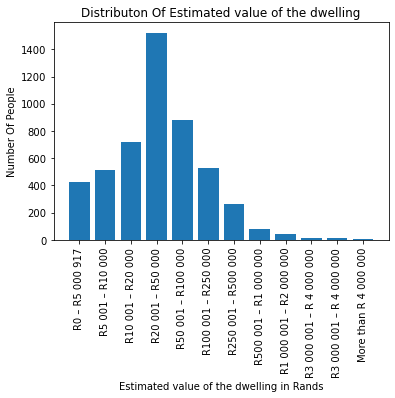

In [12]:
fig,ax = plt.subplots()

labels = ['R0 – R5 000 917','R5 001 – R10 000','R10 001 – R20 000','R20 001 – R50 000','R50 001 – R100 000',
          'R100 001 – R250 000','R250 001 – R500 000','R500 001 – R1 000 000','R1 000 001 – R2 000 000',
          'R3 000 001 – R 4 000 000','R3 000 001 – R 4 000 000','More than R 4 000 000']
x = [1,2,3,4,5,6,7,8,9,10,11,12]

ax.bar(groupby_value.index, groupby_value)
plt.title('Distributon Of Estimated value of the dwelling')
plt.xticks(x, labels, rotation='vertical')
plt.ylabel('Number Of People')
plt.xlabel('Estimated value of the dwelling in Rands')
plt.show()

2.2 The data is skewed to the right, which makes sense because there are less people who live in houses that are valued at more that R500,000 and above (from index 8).

In [13]:
df = pd.get_dummies(DATA, columns = ['Q116PRESENT','Q51MAIN','Q51NOOTH','Q52AWALLS','Q52AROOF','Q53WALLS',
           'Q53ROOF','Q54ADWELLING','Q161CPUBATT','Q161CPRIVATT','Q54AOTHER','Q56DRINK','Q56OTHER','Q518TOILET',
          'Q524ELECT','Q531POLICE','Q532FOOD','Q62OWNSHIP','Q658VALUE','Q61035POLICE','Q224BNOMONEY5','Q2341SAVING','province_code','SETTLEMENT_TYPE','hhsize'] , prefix_sep = "_",drop_first = True)

df['income'] = df['income']/100000
#df.drop(columns=['index'])
df.head()

,index,Q651TOTROOMS,Ageofhead,income,Total_IOPBV,Total_number_of_convictions,Q116PRESENT_2,Q116PRESENT_3,Q116PRESENT_4,Q116PRESENT_5,...,hhsize_13,hhsize_14,hhsize_15,hhsize_16,hhsize_17,hhsize_18,hhsize_19,hhsize_20,hhsize_22,hhsize_25
0,70,2,77,0.003623,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,72,3,52,0.005330,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,73,4,55,0.003554,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,74,1,49,0.003637,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,77,3,29,0.008361,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y = df['income']
X = df.drop(columns=['income'])
X

In [ ]:
import statsmodels.formula.api as smf

def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data: pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        print(abs(current_score-best_new_score))
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
        #if abs(current_score-best_new_score) < 0.001:
         #   break
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [ ]:
X_train, X_test, y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
y_train


In [ ]:
model = forward_selected(df,'income')
model.summary()

In [ ]:
def model_fit(X,y):    
    #no of features
    feature_list=np.arange(1, len(X_train.columns))            
    high_score=0
    #Variable to store the optimum features
    optimum_no_features=0           
    score_list =[]
    for n in range(len(feature_list)):
        model = LinearRegression()
        rfe = RFE(model,feature_list[n])
        X_train_rfe = rfe.fit_transform(X_train,y_train)
        X_test_rfe = rfe.transform(X_test)
        model.fit(X_train_rfe,y_train)
        # R2 score for measurement
        score = r2_score(y_train, model.predict(X_train_rfe))
        score_list.append(score)
        
        if n % 10 == 0:
            print(n,score)
            
        if(score>high_score):
            high_score = score  
            optimum_no_features = feature_list[n]
    return score_list, optimum_no_features 

In [ ]:
a,b =model_fit(X_train,y_train)

In [ ]:
def plt_plot(values,title, x_label, y_label):
    
    plt.plot(values)
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    
plt_plot(a, 'Score vs Number of varibales selected','Number of variables', 'Score')

In [ ]:
# fit final model using optimum number of features from prev function

def final_model(optimum_no_features, X_train, y_train):
    cols = list(X.columns)
    model = LinearRegression()
    #Initializing RFE model
    rfe = RFE(model, optimum_no_features)             
    #Transforming data using RFE
    x_fitted = rfe.fit_transform(X_train,y_train)  
    #Fitting the data to model
    model.fit(x_fitted,y_train)              
    temp = pd.Series(rfe.support_,index = cols)
    selected_features = temp[temp==True].index
    return selected_features, model, rfe

In [ ]:
selected_features, model, rfe = final_model(b, X_train, y_train)

In [ ]:
y_train_predicted = model.predict(rfe.transform((X_train)))

In [ ]:
residuals = y_train-y_train_predicted

In [ ]:
ax = sns.residplot(y_train,y_train_predicted)

In [ ]:
sns.distplot(residuals)

## Exploratory Analyses

Firstly, to explore the relationship between Province,Income,Household living conditons, the timeframe in which the household has no money for 5 days or more and the total number of Instances Of Person Being a Victim and  total number of conviction of a crime, the relationships between these variables against total number of conviction of a crime are plotted.

In [ ]:
prov = DATA.province_code
convictions = DATA.Total_number_of_convictions

labels = ['Western Cape','Eastern Cape','Northern Cape','Free State',
                    'KwaZulu-Natal','North West','Gauteng','Mpumalanga','Limpopo']
x = [1,2,3,4,5,6,7,8,9]


fig,ax = plt.subplots()
fig.set_size_inches(15, 10)
plt.xticks(x, labels, rotation='vertical')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.bar(prov,convictions)

ax.set_yticks(range(21))


plt.title('Province vs Total number of convictions')
plt.ylabel('Total number of convictions')
plt.xlabel('Provinces')
plt.show()

In [ ]:
income = DATA.income
convictions = DATA.Total_number_of_convictions

fig,ax = plt.subplots()
fig.set_size_inches(10, 10)
ax.bar(convictions,income)
plt.title('Income vs Total number of convictions')
plt.xlabel('Total number of convictions')
plt.ylabel('income (Rands)')
ax.set_xticks(range(21))
plt.show()


As it can be seen from the plot(Income vs Total number of convictions), households with people earning alot of money have less total number of convections compared to those earning less income.

In [ ]:
living_condition = DATA.Q116PRESENT
convictions = DATA.Total_number_of_convictions

labels = ['Wealthy','Very comfortable','Reasonably comfortable',
                    'Just getting along','Poor','Very poor']
x = [1,2,3,4,5,6]

fig,ax = plt.subplots()
fig.set_size_inches(15, 10)
plt.xticks(x, labels, rotation='vertical')
ax.bar(living_condition,convictions)
ax.set_xticks(x)
ax.set_yticks(range(21))
ax.set_xticklabels(labels)

plt.title('Household living condition vs Total number of convictions')
plt.ylabel('Total number of convictions')
plt.xlabel('living conditions')
plt.show()

As it can be seen from the plot that household living in a wealthy, very comfortable and reasonably comfortable living conditions face less crime convictions than those living in poor cnditions 

In [ ]:
police_dist = DATA.Q531POLICE
convictions = DATA.Total_number_of_convictions


labels = ['Less than 500m','500m – less than 1km','1km – less than 2km',
                    '2km – less than 5km','5km – less than 10km','10km – less than 20km','20km or more']
x = [1,2,3,4,5,6,7]

fig,ax = plt.subplots()
fig.set_size_inches(15, 10)
plt.xticks(x, labels, rotation='vertical')
ax.set_xticks(x)
ax.set_yticks(range(21))
ax.set_xticklabels(labels)
ax.bar(police_dist,convictions)
plt.title('Distance from the police station vs Total number of convictions')
plt.ylabel('Total number of convictions')
plt.xlabel('Distance from the police station in km')
plt.show()


As it can be seen from the plot that distance of households which are not far from the from the police station have less crime convections and house hold having a distance of 20km or more from the police station experience more crime converctions

In [ ]:
age_of_head = DATA.Ageofhead  
convictions = DATA.Total_number_of_convictions
# plt.bar(no_food, convictions)
fig,ax = plt.subplots()

ax.bar(convictions,age_of_head)
fig.set_size_inches(10, 10)
ax.set_xticks(range(21))
# ax.set_xticklabels(['Yes','No'])
plt.title('Age of household head vs Total number of convictions' )
plt.ylabel('Total number of convictions')
plt.ylabel('Age of household head')
# plt.set_xticks([1,2])
plt.show()


As it can be seen from the plot that households that had no money for 5 days have more crime convections than households that had money

In [ ]:
victims_of_crime= DATA.Total_IOPBV  
convictions = DATA.Total_number_of_convictions

# plt.scatter(no_food,convictions)
fig,ax = plt.subplots()
# fig.set_size_inches(10, 10)

ax.bar(victims_of_crime, convictions)
plt.title('Total number of Instances Of Person Being a Victim vs Total number of convictions')
plt.ylabel('Total number of convictions')
plt.xlabel('Total number of Instances Of Person Being a Victim')
ax.set_yticks(range(21))
plt.show()

The number of instances of person being a victim to a crime vs total number of convictions plot shows that it is less likely that a person who has been a victim more than 3 times to be convicted of a crime. A person who has been a victim 7 times is less likely than a person who has never been a victim to be convicted of a crime. On the other hand a person who has been a victim three times has the highest chances of being convicted of a crime.

In [ ]:
df1 = DATA[['Total_IOPBV','Total_number_of_convictions','income']]
df1_corr = df1.corr()
df1_corr

In [ ]:
b = pd.plotting.scatter_matrix(df1, figsize=(10,10))

From the correlation matrix of Total number of convictions,Total number of Instances Of Person Being a Victim, and income we can see that the correlation values are very close to zero, this indicates that the might not be a linear relationship between the variable but they are somewhat correlated.